# Tokenizer and pad_sequences
處理文本的函數

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

text1 = 'Some THING to eat !'
text2 = 'some thing to drink .'
text3 = 'some thing'
texts=[text1,text2, text3]
print(texts)
print('========')
tokenizer = Tokenizer(num_words=100) #num_words:None或整数,处理的最大单词数量。少于此数的单词丢掉
tokenizer.fit_on_texts(texts)
print(f'tokenizer.word_counts=\n{tokenizer.word_counts}') 
print(f'tokenizer.word_index=\n{tokenizer.word_index}') 

print('==========texts_to_sequences========')
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print(f'word_index=\n{word_index}')
print(f'sequences=\n{sequences}')
print('found {} unique tokens'.format(len(word_index)))

In [ ]:
pad_seq = pad_sequences(sequences, maxlen=8, padding='post')
print(pad_seq)
print('=======================')
pad_seq = pad_sequences(sequences, maxlen=8)
print(pad_seq)

# MNIST
for RNN : many to one : image 28 *28 , 分成28 row ，first row is t=0，second row is t=1 ....
形成 RNN ，最後一個 第27 抽出來: output 就是預測答案

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(y_train[:5])

[5 0 4 1 9]


In [2]:
# compute the number of labels
num_labels = len(np.unique(y_train))
print(f'num_labels ={num_labels}')

num_labels =10


In [3]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [4]:
# resize and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
print(x_train.shape)
x_test = np.reshape(x_test,[-1, image_size, image_size])
print(x_test.shape)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)


In [5]:
# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256  # state size

# model is RNN with 256 units, input is 28-dim vector 28 timesteps
model = Sequential()
# input_ shape = (timesteps, input_dim)
model.add(SimpleRNN(units=units,
                    input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               72960     
                                                                 
 dense (Dense)               (None, 10)                2570      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


In [6]:
# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 0.6460 - accuracy: 0.8263
Epoch 2/20
469/469 [==============================] - 8s 16ms/step - loss: 0.2619 - accuracy: 0.9248
Epoch 3/20
469/469 [==============================] - 8s 16ms/step - loss: 0.1892 - accuracy: 0.9456
Epoch 4/20
469/469 [==============================] - 8s 18ms/step - loss: 0.1564 - accuracy: 0.9536
Epoch 5/20
469/469 [==============================] - 9s 18ms/step - loss: 0.1325 - accuracy: 0.9610
Epoch 6/20
469/469 [==============================] - 9s 19ms/step - loss: 0.1172 - accuracy: 0.9657
Epoch 7/20
469/469 [==============================] - 9s 19ms/step - loss: 0.1064 - accuracy: 0.9689
Epoch 8/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0971 - accuracy: 0.9717
Epoch 9/20
469/469 [==============================] - 12s 25ms/step - loss: 0.0897 - accuracy: 0.9732
Epoch 10/20
469/469 [==============================] - 12s 25ms/step - loss: 0.0818 - acc

In [7]:
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 97.7%


# IMDB
電影評論的資料集

In [9]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist
import tensorflow as tf

total_words = 10000
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=total_words)
print(f'x_train.shape={x_train.shape}')
print(f'y_train.shape={y_train.shape}')
print(f'x_train[:5]=\n{x_train[:5]}')  # 電影影評(Word to ID(數字))
print(f'y_train[:5]=\n{y_train[:5]}')

print(f'x_test.shape={x_test.shape}')
print(f'y_test.shape={y_test.shape}')

x_train.shape=(25000,)
y_train.shape=(25000,)
x_train[:5]=
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178,

In [10]:
# pad_sequences : 統一_x_train 的長度都一樣 80，0 加在前面
max_review_len = 80
# x_train:[b, 80]
# x_test: [b, 80]
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_review_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_review_len)

In [11]:
batch_size = 32
db_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# drop_remainder=True: if batch 無法整除，剩下的刪除不要 
db_train = db_train.shuffle(1000).batch(batch_size, drop_remainder=True)
db_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
db_test = db_test.batch(batch_size, drop_remainder=True)

In [12]:
embedding_len =32

class MyRNN(tf.keras.Model):

    def __init__(self, units):
        super(MyRNN, self).__init__()

        # [b, 64]
        self.state = [tf.zeros([batch_size, units])]
        # self.state1 = [tf.zeros([batchsz, units])]
        # transform text to embedding representation
        # [b, 80] => [b, 80, 100]
        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len,
                                          input_length=max_review_len)
        # [b, 80, 100] , h_dim: 64
        # RNN: cell1 ,cell2, cell3
        # SimpleRNN
        self.rnn_cell = tf.keras.layers.SimpleRNNCell(units, dropout=0.2)
        # self.rnn_cell1 = layers.SimpleRNNCell(units, dropout=0.5)
        # fc, [b, 80, 100] => [b, 64] => [b, 1]
        self.fc= tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):
        # [b, 80]
        x = inputs
        # embedding: [b, 80] => [b, 80, 100]
        x = self.embedding(x)
        # rnn cell compute
        # [b, 80, 100] => [b, 64]
        state = self.state
        # state1 = self.state1
        for word in tf.unstack(x, axis=1): # word: [b, 100]
            # h1 = x*wxh+h0*whh
            # out: [b, 64]
            out, state = self.rnn_cell(word, state, training)
        # out: [b, 64] => [b, 1]
        x = self.fc(out)
        # p(y is pos|x)
        prob = tf.sigmoid(x)

        return prob

model = MyRNN(64) 
#self.fc= tf.keras.layers.Dense(1) 分成一類用 loss='binary_crossentropy
model.compile(optimizer='adam',
              loss='binary_crossentropy',  
              metrics=['accuracy'])

In [13]:
history = model.fit(db_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=db_test,
                    verbose=1)

Epoch 1/5
781/781 [==============================] - 9s 9ms/step - loss: 0.5629 - accuracy: 0.6989 - val_loss: 0.6268 - val_accuracy: 0.6520
Epoch 2/5
781/781 [==============================] - 7s 8ms/step - loss: 0.4606 - accuracy: 0.7869 - val_loss: 0.4207 - val_accuracy: 0.8124
Epoch 3/5
781/781 [==============================] - 7s 9ms/step - loss: 0.3543 - accuracy: 0.8492 - val_loss: 0.4181 - val_accuracy: 0.8213
Epoch 4/5
781/781 [==============================] - 6s 8ms/step - loss: 0.2798 - accuracy: 0.8863 - val_loss: 0.4625 - val_accuracy: 0.7983
Epoch 5/5
781/781 [==============================] - 7s 9ms/step - loss: 0.3850 - accuracy: 0.8254 - val_loss: 0.5395 - val_accuracy: 0.8079


# IMDB (keras)

Loading data......
25000 train sequences
25000 test sequences
Pad Sequences (samples x time
input_train shape: (25000, 500)
input_test shape: (25000, 500)
Epoch 1/10
157/157 [==============================] - 13s 81ms/step - loss: 0.6150 - acc: 0.6586 - val_loss: 0.4514 - val_acc: 0.8172
Epoch 2/10
157/157 [==============================] - 13s 82ms/step - loss: 0.3899 - acc: 0.8397 - val_loss: 0.3922 - val_acc: 0.8404
Epoch 3/10
157/157 [==============================] - 14s 88ms/step - loss: 0.2898 - acc: 0.8842 - val_loss: 0.4158 - val_acc: 0.8134
Epoch 4/10
157/157 [==============================] - 14s 91ms/step - loss: 0.2453 - acc: 0.9062 - val_loss: 0.3815 - val_acc: 0.8378
Epoch 5/10
157/157 [==============================] - 17s 107ms/step - loss: 0.1907 - acc: 0.9307 - val_loss: 0.3904 - val_acc: 0.8370
Epoch 6/10
157/157 [==============================] - 17s 106ms/step - loss: 0.1413 - acc: 0.9500 - val_loss: 0.4989 - val_acc: 0.7738
Epoch 7/10
157/157 [===================

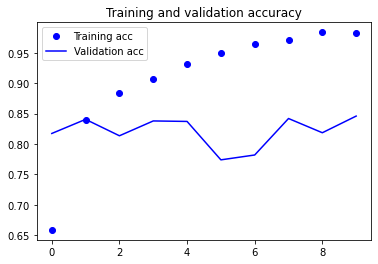

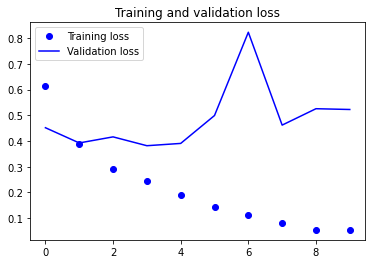

In [14]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf


max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data......')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad Sequences (samples x time')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

from tensorflow.keras.layers import Dense, Embedding

model = Sequential()
model.add(tf.keras.layers.Embedding(max_features, 32))
model.add(tf.keras.layers.SimpleRNN(32))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
hist = model.fit(input_train, y_train,
                 epochs=10,
                 batch_size=128,
                 validation_split=0.2)

import matplotlib.pyplot as plt

acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
